## Time table:



1.   DONE: Intro: DNA/proteins/polymers/amino acids
            protein --> aminoacid --> atom (different reprenstations)
3.   DONE: sequence --> stucture (AF?)
4.   DONE: explore structure (ngl view)
      - questions? (find something)
      - color different things (amino acid)


5.   simulations
      - fake: setup (structure / water /ions)
            -loading multiple files (write/copy comands)
      - small system? (start it on the presenting laptop)
6.   simulations of the real stuff from the group
      - load a given trajectory & watch the movie

7.   examples and what we learned from this?
      -temperature simulation doplets (mahesh)
      -DNA / membrane (Cerille)
      -protein-ligand
      -grey condensate (Gaurav)


8.   important & usefull findings from simulations

      -HIV drug
      -protein punches hole in membrane
      -help with/add information that experiments do not show

9. relevant in everday life or industry / become a phd student or scientist!


## imports

In [71]:
#data
import os
import MDAnalysis as mda
import nglview as nv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## functions

In [2]:
def three_to_one(resname):
    # Dictionary mapping three-letter codes to one-letter codes
    three_to_one_dict = {
        'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D',
        'CYS': 'C', 'GLN': 'Q', 'GLU': 'E', 'GLY': 'G',
        'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K',
        'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
        'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
    }
    one_letter_code = three_to_one_dict.get(resname, 'X')  # 'X' for unknown or non-standard residues

    return one_letter_code

In [16]:
def one_to_three(one_letter):
    # Dictionary mapping one-letter codes to three-letter codes
    one_to_three_dict = {
        'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP',
        'C': 'CYS', 'Q': 'GLN', 'E': 'GLU', 'G': 'GLY',
        'H': 'HIS', 'I': 'ILE', 'L': 'LEU', 'K': 'LYS',
        'M': 'MET', 'F': 'PHE', 'P': 'PRO', 'S': 'SER',
        'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL'
    }
    
    return one_to_three_dict.get(one_letter, 'UNK')

In [10]:
def plot_letter_histograms(strings, labels):
    plt.figure()
    filename="residue_types_"+"".join(labels)
    all_letters = sorted(set("".join(strings)))  # Get all unique letters in alphabetical order
    transformed_labels = [one_to_three(letter) for letter in all_letters]
    x = np.arange(len(all_letters))  # X positions for bars
    width = 0.2  # Width of each bar
    
    for i, string in enumerate(strings):
        letter_counts = Counter(string)
        total_letters = sum(letter_counts.values())
        densities = [letter_counts.get(letter, 0) / total_letters if total_letters > 0 else 0 for letter in all_letters]
        plt.bar(x + i * width, densities, width=width, label=labels[i], alpha=0.7, color=colors["lines"][i+1])

 

    
    plt.xticks(x + (len(strings) - 1) * width / 2, transformed_labels,rotation=90)  # Adjust x-axis ticks
    plt.xlabel("Amino acid type")
    plt.ylabel("number fraction")
    #plt.title("Letter Frequency Histograms")
    plt.legend()
    plt.savefig(filename +'.png')
    plt.show()

In [20]:
#plots
plt.rcParams['figure.figsize'] = (20,20)  # Adjust the tuple for the desired figure size
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 20
p=0.05 #percentage of values that are labeled
file_res=600


plt.style.use('tableau-colorblind10')  # Example: 'ggplot', 'seaborn-dark', 'bmh', 'tableau-colorblind10'

# Custom color palette (optional)
colors = {
    "background": "#f5f5f5",
    "grid": "#d3d3d3",
    "text": "#333333",
    "lines": ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
}

# Apply custom colors
plt.rcParams['axes.facecolor'] = colors["background"]
plt.rcParams['axes.edgecolor'] = colors["text"]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = colors["grid"]
plt.rcParams['text.color'] = colors["text"]
plt.rcParams['xtick.color'] = colors["text"]
plt.rcParams['ytick.color'] = colors["text"]

## Hands-on

### Introduction

1.   Intro: Proteins/amino acids
            protein --> aminoacid --> atom (different reprenstations)

### What is Protein (das Eiweiß)?

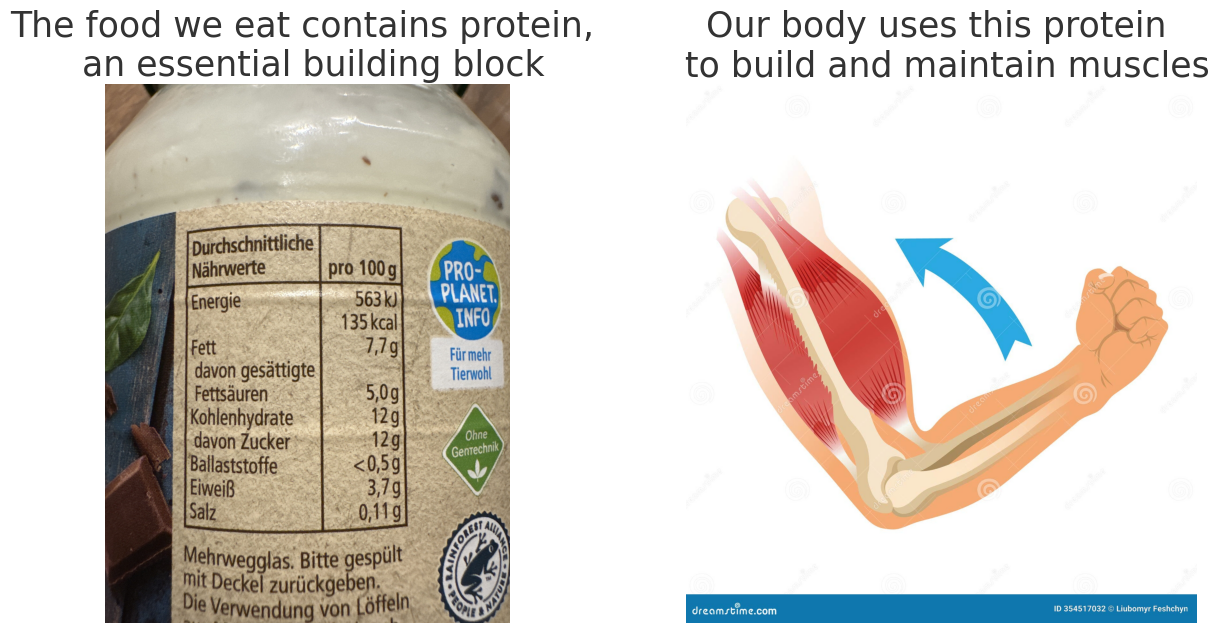

In [108]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
muscle = Image.open("arm-muscle-biceps-skeleton-muscle-tension-human-hand-white-background-bones-joints-male-silhouette-medical-354517032.jpg")
protein_content = Image.open("nutrition_de_yogurt.jpg")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Display the first image
axes[0].imshow(protein_content)
axes[0].axis("off")
axes[0].set_title("The food we eat contains protein, \n an essential building block")

# Display the second image
axes[1].imshow(muscle)
axes[1].axis("off")
axes[1].set_title("Our body uses this protein \n to build and maintain muscles")

# Show the images
plt.show()


### What is protein made of?

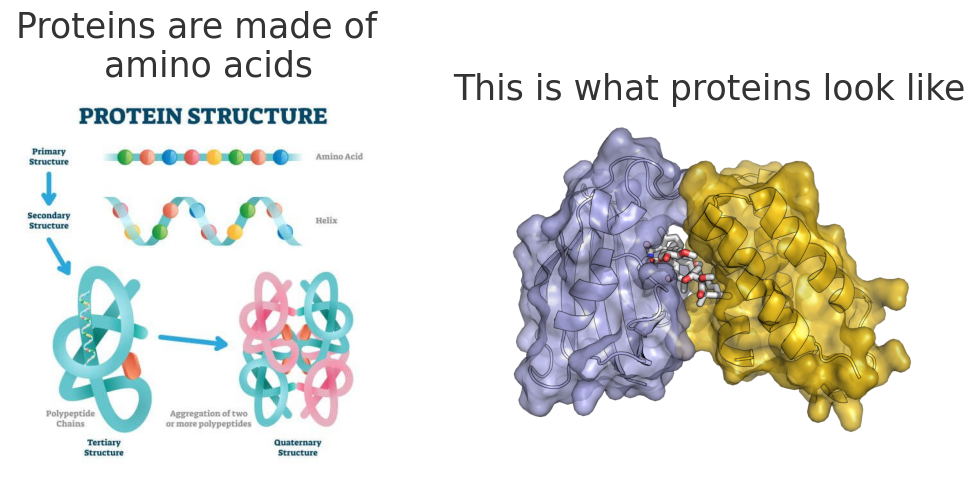

In [96]:
# Load the images
protein_structure1 = Image.open("levels-of-protein-structure-1.jpg")
protein_structure2 = Image.open("sticks_surface_ray-5_highres.webp")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display the first image
axes[0].imshow(protein_structure1)
axes[0].axis("off")
axes[0].set_title("Proteins are made of \n amino acids")

# Display the second image
axes[1].imshow(protein_structure2)
axes[1].axis("off")
axes[1].set_title("This is what proteins look like")

# Show the images
plt.show()

### What are Amino acids?

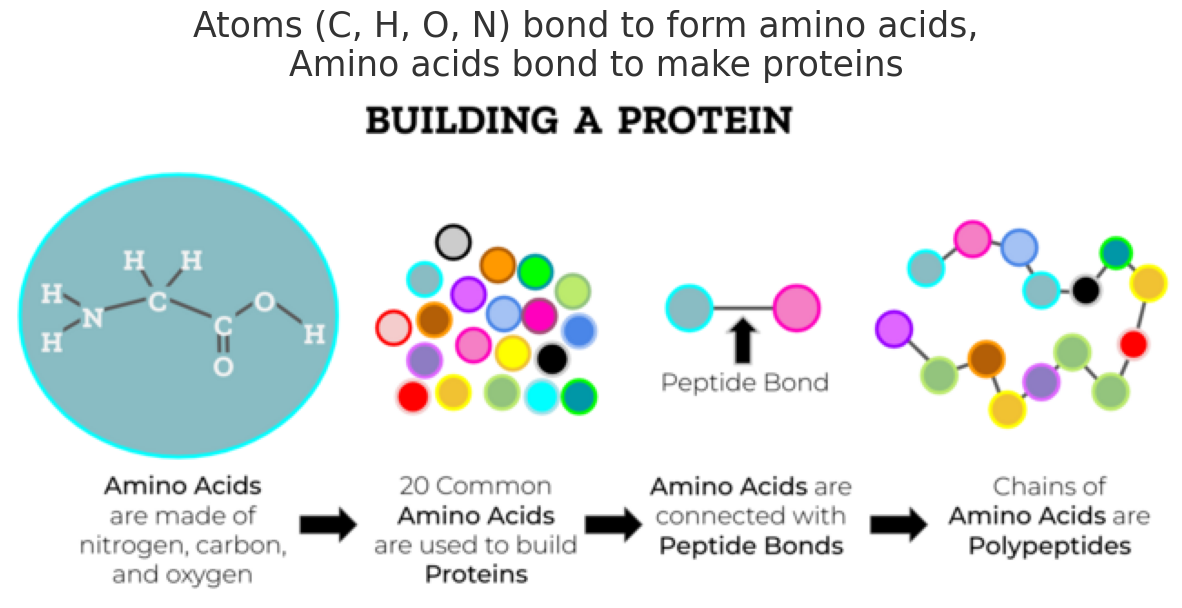

In [102]:
# Load the image
amino_acids = Image.open("Basic_Protein_Structure.png")

# Create a single plot
fig, ax = plt.subplots(figsize=(15, 10))

# Display the image
ax.imshow(amino_acids)
ax.axis("off")
ax.set_title("Atoms (C, H, O, N) bond to form amino acids, \n Amino acids bond to make proteins")

# Show the image
plt.show()

#### DNA - Proteins - Amino Acids - Sequence

### Explore sequence to structure

Every protein has a unique sequence of amino acids, like beads on a string in a necklace. That means we can write it as a long sequence of letters and every letter represents one type of amino acid. In the necklace  The sequences can be determined in a lab by ??? As computational scientist our starting point is the sequence. At that point we have no idea how the protein looks like.

In [3]:
top='PEI1_07d79.pdb'
name='PEI-1'
u_PEI1=mda.Universe(top)
ca_PEI1=u_PEI1.atoms.intersection(u_PEI1.select_atoms('name CA'))
l=[three_to_one(item) for item in u_PEI1.residues.resnames]
PEI1_sequ=''.join(l)
PEI1_sequ

'MFFSNSLHANAAPQHFERIAKILQAKRRAGDFSTCDVKIQLKTGFDMVHSVVICAHSDVFSETFDNQRAPYQPFNMTDFDPDSVRRVFDWMYSGEIDIPETTIADVLAVASYLRVTMLQRQIEQKILNHNGSPIMALNIASARAFSVMDHTMNDLVHGFTEKMTGLGIDEVAKLTANSMIAVMAAVLPMKKKVPLVNMFISWIVCKQPERETINTIIQSLVISDITYDTLYAIRYSLKQYLTNSEIASKSQLTISPSGTIEIKIVPKKESMVSEKSSSLHSVVELPPNQYYRTRSEISAIDKMPDPFVRNLPRTQSASSMIARPRSSGGFPQYFTRSEVEDLQQMTDPFSKSERGMTPTRGPPMGFSSVQCTVKYPGWSKDVMETNKEMYKQCKMNGRYILSEAQTESNAPVFLRPAVGGKVSSSRGALSNLSNSEQNKKYGRGVTQSFSGHSLNDNDPMPKEHDPKVQPSVIISCLSLPTTSPVSVVKPKMTGVKKTDSEIMEINALPSSFNSNSFYTAKTSNTSGHSNDQSAGKSEKSQRSQKSEKSQKLKKPIPQSQYLYPN'

To understand how the protein looks like we need to study how it folds. That has been a field of reasearch for with experimental xraycristallography and cryo-em methods. Nowadays based on that available data AlphaFold, a machine learning model, was trained to predict the structure of proteins.

### Task: folding a protein (we show this due to google account): takes 20 minutes
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb

### Task: explore the structure:

In [70]:
#vizualize PEI1
view_PEI1= nv.show_mdanalysis(u_PEI1, default_representation=False) #structure
view_PEI1.add_cartoon(u_PEI1.residues, color="lightblue",opacity=0.5,depthWrite=True)
view_PEI1.center()
view_PEI1

NGLWidget()

Support for third party widgets will remain active for the duration of the session. To disable support:

## question: how many helicis (small spirals) can you find?

make the structure full screen and explore it, write your answer here: 

## question: what aminoacids are in our protein?

use this function to count them:

In [22]:
strings = [PEI1_sequ]
labels = ["PEI1"]

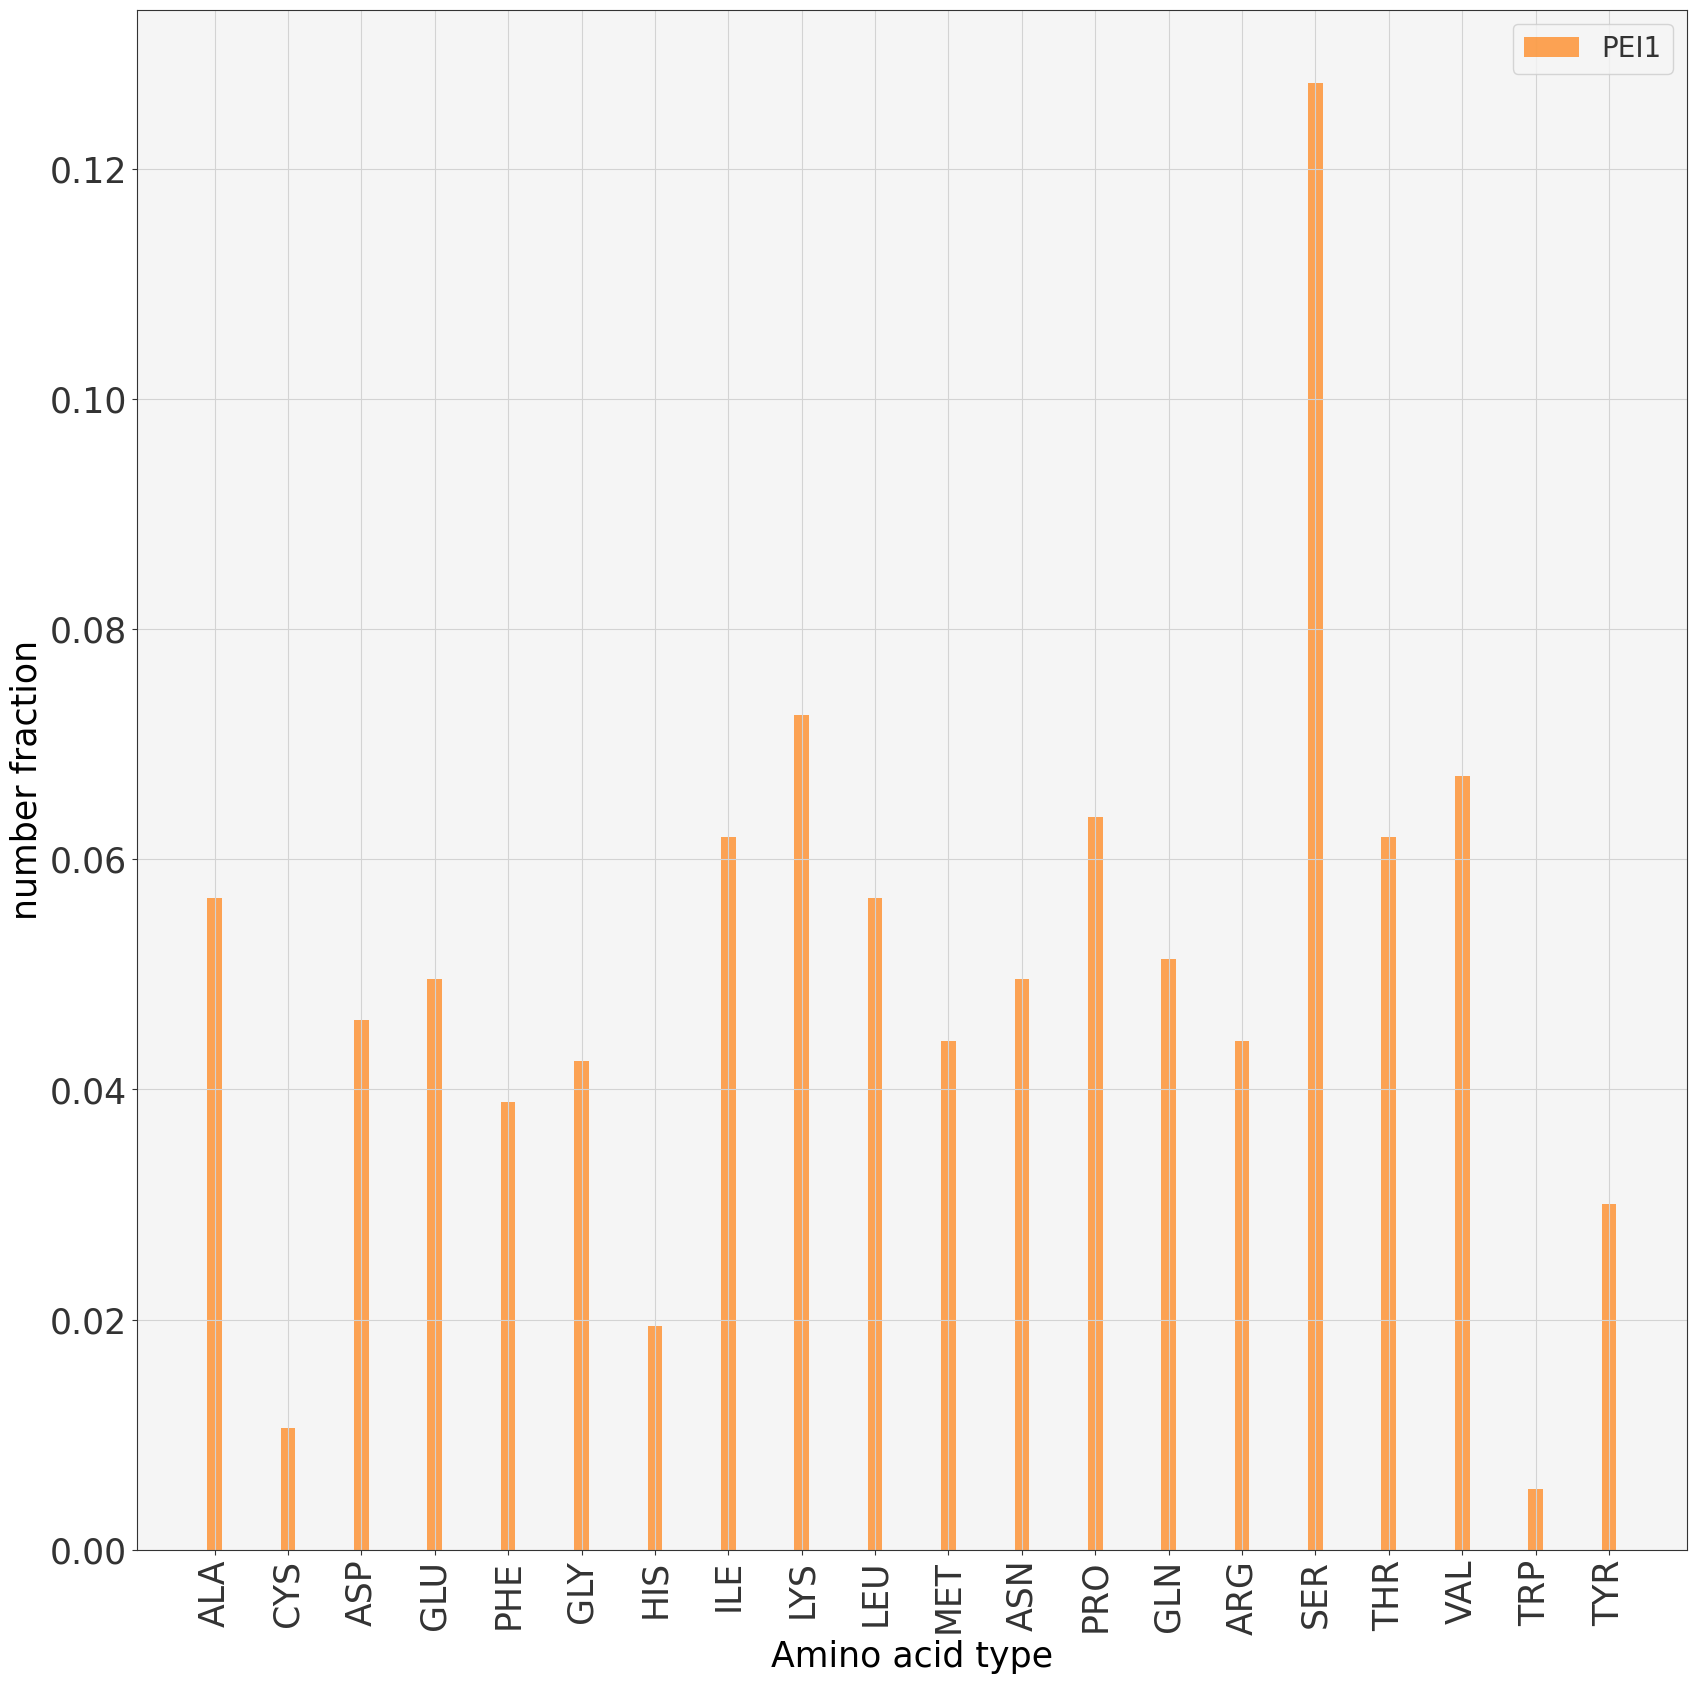

In [23]:
plot_letter_histograms(strings,labels) 

What is the name of the most frequent amino acid? Write your answer here: 

In [72]:
view_PEI1_2= nv.show_mdanalysis(u_PEI1, default_representation=False) #structure
view_PEI1_2.add_cartoon(u_PEI1.residues, color="resname",opacity=0.5,depthWrite=True)
view_PEI1_2.center()
view_PEI1_2

NGLWidget()

What is the color of the most frquent amino acid? What amino acids are colored in grey, in green, in yellow? Write your answer here: 

## question: How do differnt amino acids look like?

In [40]:
tyrosines = u_PEI1.select_atoms("resname TYR")
argenines = u_PEI1.select_atoms("resname ARG")

#please find all serines (SER)
#[]

In [69]:
view_PEI1_2= nv.show_mdanalysis(u_PEI1, default_representation=False) #structure
view_PEI1_2.add_ball_and_stick(u_PEI1.residues, color="resname",opacity=0.5,depthWrite=True)
view_PEI1_2.add_surface(tyrosines.residues, color="blue",opacity=0.5,depthWrite=True)
view_PEI1_2.add_surface(argenines.residues, color="orange",opacity=0.5,depthWrite=True)
#please color all serines (SER) red
#[]
view_PEI1_2.center()
view_PEI1_2

NGLWidget()

Can you zoom in? How are tyrosines and argenines,serines different in their structure? Write your answer here: 

## Check on the AlphaFold structure